## **Development of an Interactive Web Application for Udemy's Course Recommendation System Utilizing Content-Based and Collaborative Filtering Techniques**

### **Introduction**

In today's era of globalization and digitalization, competition in the job market is becoming tougher. Professionals need to constantly improve their skills and knowledge to stay relevant and competitive. Taking courses is an effective way to support careers.

The importance of courses is matched by the rapid advancements in technology today. Advanced technology has changed how we learn and access knowledge. With the growth of the internet and digital technology, education is now more technology-based. E-learning, or online learning, has become a global trend, allowing for wider and more inclusive access to education. Online courses offer flexibility and accessibility, enabling individuals to learn according to their needs without having to leave their jobs or other commitments, making them very popular.

Udemy is an online learning platform offering a diverse array of courses across various disciplines. Topics include software development, business, design, marketing, photography, music, and more. With over 213,000 courses available in more than 75 languages, Udemy provides valuable resources for enhancing job-related skills. However, with thousands of courses available in various fields, users often face challenges in finding the courses that best match their needs and interests. This is where recommendation systems come into play. These systems use advanced algorithms to analyze user data and provide personalized suggestions. They help users find relevant courses and enhance their overall learning experience.

Data shows that good course recommendations can increase user satisfaction and loyalty. According to Udemy's internal studies, users who receive course recommendations tend to have higher course completion rates. Additionally, a report from Gartner reveals that 63% of users feel more satisfied when they receive relevant recommendations. Personalized recommendations not only help users find relevant courses but also increase their commitment to completing them.

Studies also show that users who receive recommendations based on their interests and needs tend to complete more courses and feel more satisfied with their learning experience. According to a report from McKinsey, 35% of Amazon purchases and 75% of Netflix views come from product recommendations. This data shows the power of recommendation systems in boosting sales and user retention. In the context of online education, an effective recommendation system can increase course completion rates and user loyalty, ultimately contributing to higher retention and sales.


In this project, we will create a Udemy course recommendation system from udemy course and comment data. There are two datasets provided:

1. `Course_info` dataset contains all the information about the courses such as `course_id`, `avg_rating`, `num_subscribers`, `title`, etc.
2. `Comments` dataset contains the information about user who gave their rating and comments to courses they watched.

I will develop a course recommendation system for Udemy using content-based and collaborative filtering approaches through the streamlit platform.

In [ ]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import re

%matplotlib inline

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Course Info**

In [ ]:
# load data course_info
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ DS 24_Novita Fitriani_Progress Final Project/Dataset/Course_info.csv')

In [ ]:
# Showing top 5 rows of the data course_info
df.head(3)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/


In [ ]:
#show info from data course_info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209703 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

Observations:
1. The columns `id`, `price`, `num_subscribers`, `avg_rating`, `num_review`, `num_comments`, `num_lectures`, and `content_length_min` contain numeric data, specifically float values.
2. The `is_paid` column is binary, containing true or false values.
3. The columns `title`, `headline`, `category`, `subcategory`, `topic`, `language`, `course_url`, `instructor_name`, and `instructor_url` contain categorical data.
4. The `published_time` and `last_update_date` columns contain time data, so their data types need to be adjusted accordingly.
5. Some float data types should be converted to integers, such as `id`, `num_subscribers`, `num_reviews`, `num_comments`, `num_lectures`, and `content_length_min`.

The data contains several information as follows:

<center>
    
| Columns  | Description |
|----------|-------------|
| `id` | A unique identifier for each course |
| `title` | The title of the course |
| `is_paid` | Indicates whether the course is paid (true) or free (false) |
| `price` | The price of the course |
| `headline` | A brief description or tagline of the course |
| `num_subscribers` | The number of people subscribed to the course |
| `avg_rating` | The average rating given by students who have taken the course |
| `num_reviews` | The number of reviews left by students |
| `num_comments` | The number of comments made by students |
| `num_lectures` | The total number of lectures in the course |
| `content_length_min` | The total length of the course content in minutes |
| `published_time` | The date and time when the course was first published |
| `last_update_date` | The date and time when the course was last updated |
| `category` | The main category to which the course belongs |
| `subcategory` | The subcategory under the main category |
| `topic` | The specific topic or subject matter of the course |
| `Language` | The language in which the course is taught. |
| `Course_url` | The URL link to the course page |
| `instructor_name` | The name of the course instructor |
| `instructor_url` | The URL link to the instructor's profile |

In [ ]:
# Change the type of the data for efficient storage
dtypes = {'id' : 'int64',
          'num_subscribers' : 'int32',
          'num_reviews' : 'int32',
          'num_comments' : 'int32',
          'num_lectures' : 'int32',
          'content_length_min' : 'int32'}

df = df.astype(dtypes)

df['published_time'] = pd.to_datetime(df['published_time'])
df['last_update_date'] = pd.to_datetime(df['last_update_date'])

# Change the values in the column of is_paid to 'Paid' and 'Free' to make them more descriptive
df['is_paid'] = df['is_paid'].map(pd.Series({True : 'Paid', False : 'Free'})).astype('object')

### **Missingg Value Check**

In [ ]:
def missing_value(df):

    missing = []
    for columns in df.columns:
        missing_shape = df[df[columns].isna()].shape
        percentage = round(missing_shape[0]/df.shape[0] * 100, 3)

        if df[columns].dtypes != 'object':
            max, min = df[columns].max(), df[columns].min()
        else:
            max, min = '-', '-'

        missing.append({'Columns' : columns,
                        'N/A count' : missing_shape[0],
                        'Percentage' : str(percentage) + '%',
                        'Max' : max,
                        'Min' : min}
                        )
    return pd.DataFrame(missing).sort_values(by='Percentage', ascending=False)

missing = missing_value(df)
missing

,Columns,N/A count,Percentage,Max,Min
15,topic,958,0.457%,-,-
19,instructor_url,427,0.204%,-,-
12,last_update_date,137,0.065%,2022-10-10 00:00:00,2012-10-31 00:00:00
4,headline,31,0.015%,-,-
18,instructor_name,5,0.002%,-,-
11,published_time,0,0.0%,2022-10-05 17:04:08+00:00,2010-01-12 18:09:46+00:00
17,course_url,0,0.0%,-,-
16,language,0,0.0%,-,-
14,subcategory,0,0.0%,-,-
13,category,0,0.0%,-,-


In [ ]:
# Total missing value
missing_percentage = missing['N/A count'].sum() / df.shape[0] * 100
print('Missing Value Percentage = {:.2f}%'.format(missing_percentage))

Missing Value Percentage = 0.74%


Observations:
- There are 5 columns with missing values, with a total missing value percentage of 0.74%.
- The most significant contribution to missing value data is `topic`, contributing 0.457%.
- Since the overall percentage of missing values is small, it is acceptable to delete them.
- We need to check if the 0 values in numeric columns like `num_lectures`, `num_comments`, `num_reviews`, `avg_rating`, `num_subscribers`, `price`, and `content_length_min` are valid or not.

In [ ]:
# drop all nan value
df.dropna(inplace=True)

# check missing value again
missing_value(df)

,Columns,N/A count,Percentage,Max,Min
0,id,0,0.0%,4914146,2762
1,title,0,0.0%,-,-
18,instructor_name,0,0.0%,-,-
17,course_url,0,0.0%,-,-
16,language,0,0.0%,-,-
15,topic,0,0.0%,-,-
14,subcategory,0,0.0%,-,-
13,category,0,0.0%,-,-
12,last_update_date,0,0.0%,2022-10-10 00:00:00,2012-10-31 00:00:00
11,published_time,0,0.0%,2022-10-05 17:04:08+00:00,2010-04-14 16:32:46+00:00


### **Duplicated Check**

In [ ]:
# Check duplicated value
duplicated_percentage = df.duplicated().sum() / df.shape[0] * 100

# Print total duplicated value and its percentage
print('Total Duplicate Data = {} \nDuplicated Percentage = {:.2f}%'.format(df.duplicated().sum(), duplicated_percentage))

Total Duplicate Data = 0 
Duplicated Percentage = 0.00%


There are no duplicates in the data, which means each primary key is unique and does not repeat.

### **Outliers Check**

In [ ]:
def calculate_outlier(df):
    outliers_list = []

    for col in df.columns:
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)

        IQR  = percentile75 - percentile25

        upper_limit = percentile75 + 1.5*IQR
        lower_limit = percentile25 - 1.5*IQR

        outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
        percentage = outliers.shape[0] / df.shape[0] * 100

        outlier_dict = {'Feature' : col,
                        'Outlier Percentage' : f'{percentage:.2f}' + '%'}

        outliers_list.append(outlier_dict)

    # display it using dataframe for better reading
    return pd.DataFrame(outliers_list)

In [ ]:
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()
df_numeric = df[numeric_cols]

In [ ]:
calculate_outlier(df_numeric)

,Feature,Outlier Percentage
0,id,0.00%
1,price,5.45%
2,num_subscribers,14.90%
3,avg_rating,14.02%
4,num_reviews,14.30%
5,num_comments,13.84%
6,num_lectures,8.08%
7,content_length_min,9.12%
8,published_time,2.29%
9,last_update_date,5.43%


Observations:
- Almost all features have outliers greater than 5%. Only `published_time` has outliers below 5%.
- Some features with outliers above 10% include `num_subscribers`, `avg_rating`, `num_reviews`, and `num_comments`.
- The outliers are too much, removing all the outliers are not a good move. Let's no intefere the outliers at the moment.
- The outliers will be handled according to which features we want to keep for further processing.

## **EDA Course_info**

### **Statistical Summary**

In [ ]:
categorical = []
numerical = []
for col in df.columns:
  if df[col].dtypes == 'object':
    categorical.append(col)
  else:
    numerical.append(col)

In [ ]:
categorical

['title',
 'is_paid',
 'headline',
 'category',
 'subcategory',
 'topic',
 'language',
 'course_url',
 'instructor_name',
 'instructor_url']

In [ ]:
numerical

['id',
 'price',
 'num_subscribers',
 'avg_rating',
 'num_reviews',
 'num_comments',
 'num_lectures',
 'content_length_min',
 'published_time',
 'last_update_date']

In [ ]:
# numerical statistical summary
df[numerical].describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,last_update_date
count,2.081860e+05,208186.000000,2.081860e+05,208186.000000,208186.000000,208186.000000,208186.000000,208186.000000,208186
mean,3.013403e+06,81.754983,3.104886e+03,3.751604,245.382307,45.068578,36.640567,266.212353,2020-10-25 22:46:58.287493120
min,2.762000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2012-10-31 00:00:00
25%,1.949360e+06,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000,2020-02-18 00:00:00
50%,3.287009e+06,34.990000,2.070000e+02,4.333334,17.000000,5.000000,22.000000,133.000000,2021-04-27 00:00:00
75%,4.184946e+06,99.990000,1.441000e+03,4.625000,75.000000,18.000000,42.000000,290.000000,2022-03-17 00:00:00
max,4.914146e+06,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000,2022-10-10 00:00:00
std,1.340763e+06,117.375812,1.561945e+04,1.529485,2466.346634,357.000620,51.940302,455.292208,NaN


Observations:
- The average course `price` is **81.75**, with the lowest value being 0 and the highest 999.99. A price of 0 means the course is free.
- The average number of subscribers (`num_subscribers`) is 3105, with the lowest number being 0 and the highest 1752364. A subscriber count of 0 means that currently, no one has registered or subscribed to take the course. In other words, there are no active participants or registered users for that course.
- The average course rating (`avg_rating`) given is 3.7, with the highest rating being 5 and the lowest 0. A rating of 0 means that no one has watched the course yet, hence there have been no ratings.
- The average number of comments (`num_comments`) received is 45, with the maximum being 1095 and the minimum 0. A comment count of 0 means that no one has commented on the course.
- The average number of lectures (`num_lectures`) available in each course is 37, with the maximum being 1095 and the minimum 0. These maximum and minimum values can be further analyzed as potential outliers. A num_lectures value of 0 means that the course has no video or learning sessions available to access. In other words, there is no learning material available in that course.
- The average total duration (in minutes) of all content presented (`content_length_min`) is 266, with the highest value being 22570 minutes and the lowest 0. Further analysis may be needed for cases where content_length_min=0, as these are likely outliers. If `content_length_min` is 0 in a Udemy course, it means the course has no learning content available or the duration is not defined. In other words, there is no learning material presented in that course.







In [ ]:
# describe method on categorical data
df[categorical].describe()

,title,is_paid,headline,category,subcategory,topic,language,course_url,instructor_name,instructor_url
count,208186,208186,208186,208186,208186,208186,208186,208186,208186,208186
unique,206742,2,201309,13,130,3815,79,208186,72358,73216
top,Certified Dance Therapy English Drama Story Ex...,Paid,Curso básico desde 0,Development,Other IT & Software,Python,English,/course/vegan-vegetarian-cooking-school/,Packt Publishing,/user/packtpublishing/
freq,14,186662,184,31476,11484,2547,122829,1,1253,1253


Observations:
- is_paid has 2 inputs: True or False. True means the course is paid, False means the course is free.
- There are 13 different categories, 130 subcategories, 3815 topics, and 79 languages.

### **Univariate Analysis**

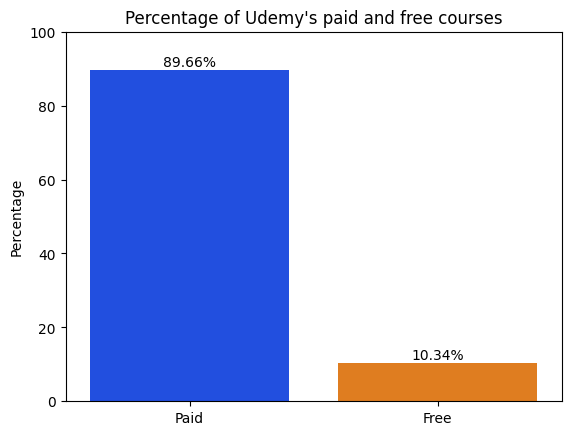

In [ ]:
ax = sns.countplot(df, x='is_paid', stat='percent', palette='bright')

percentage = round(df['is_paid'].value_counts() * 100 /len(df), 2)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height() + 1
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

ax.set(xlabel='', ylabel='Percentage', title="Percentage of Udemy's paid and free courses")
plt.ylim(0,100)
plt.show()

Observations:
- From the graph, it can be seen that 89.66% of the courses are paid, and 10.34% are free. This means that the majority of the courses offered require payment to access, while only a small portion can be accessed for free.

In [ ]:
def feature_quantity(data,name):
  count_feature = data.groupby(name).agg(num_trx=('id','count')).reset_index()
  return count_feature.sort_values('num_trx',ascending=False)

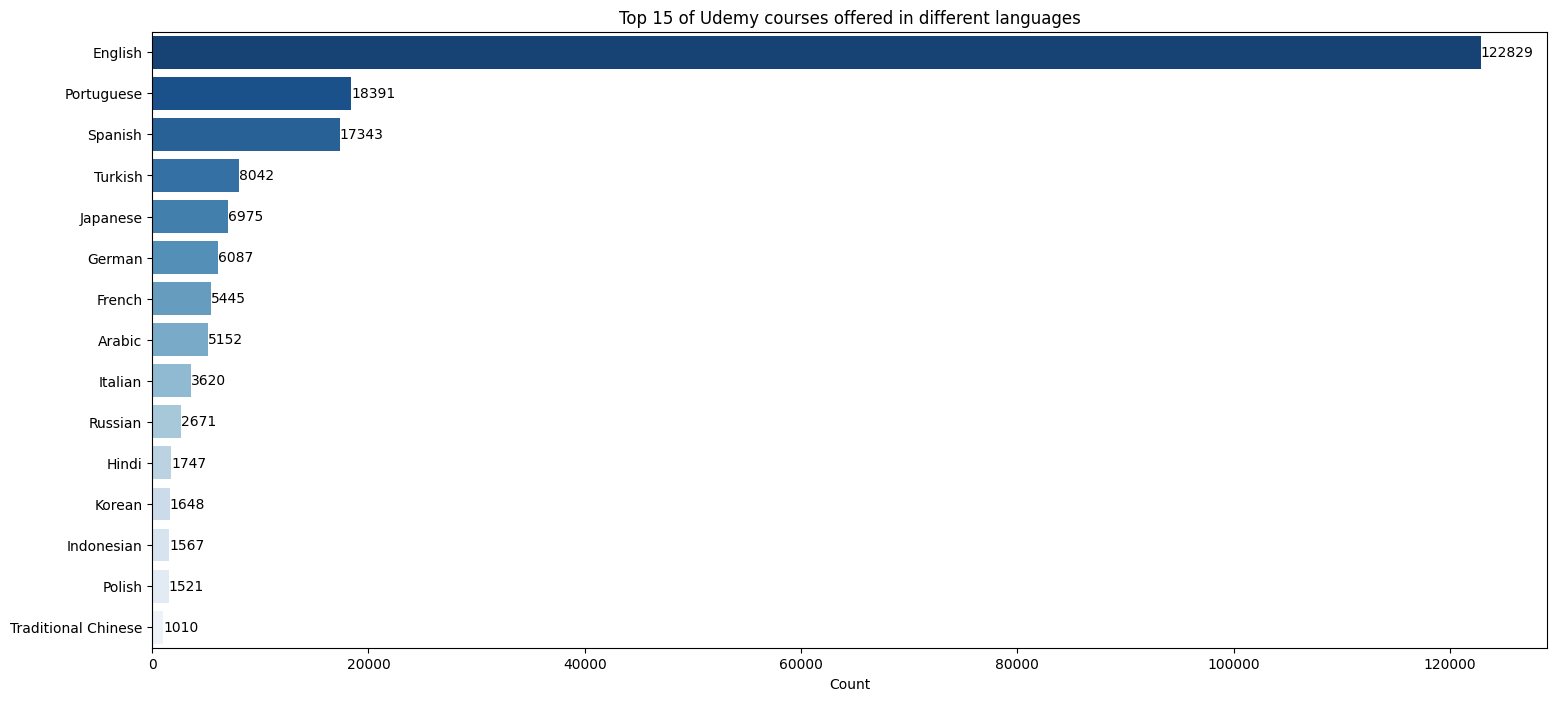

In [ ]:
# Top 15 languages in Udemy Courses
df_lang = feature_quantity(df, 'language')[:15]

plt.figure(figsize=(18,8))
ax = sns.barplot(x=df_lang['num_trx'], y=df_lang['language'], palette='Blues_r')

for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='Count', ylabel='', title='Top 15 of Udemy courses offered in different languages')
plt.show()

Observations:
- The most commonly used language in Udemy courses is English, with a total of 122,829 courses.
- Indonesian ranks 13th, with a total of 1,567 courses available in Indonesian.
- I will focus on these two languages, English and Indonesian, as they are the most relevant to the readers' needs.

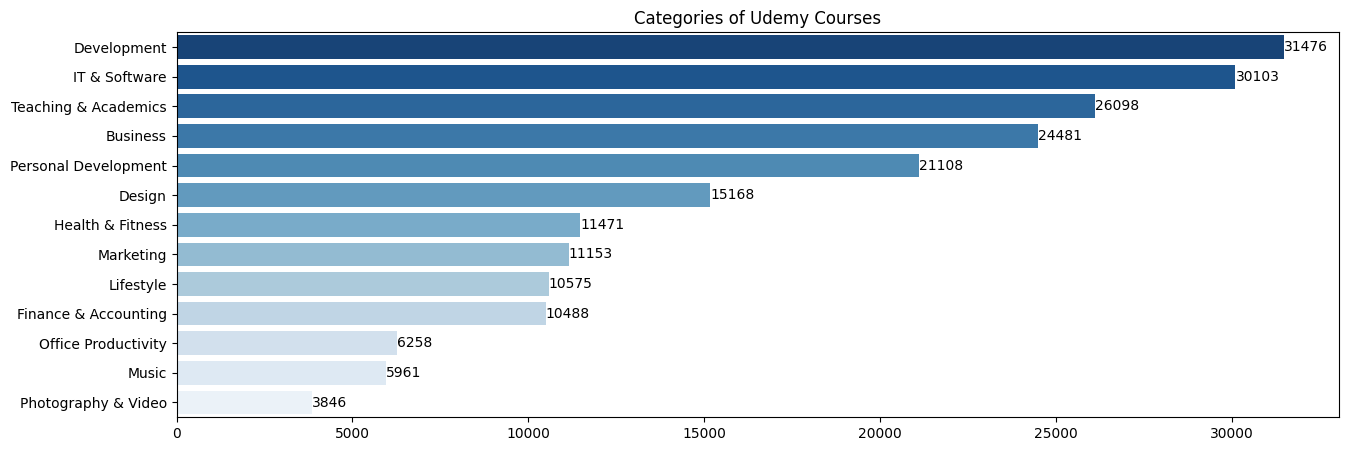

In [ ]:
df_category = feature_quantity(df, 'category')

plt.figure(figsize=(15,5))
ax = sns.barplot(x=df_category['num_trx'], y=df_category['category'], palette='Blues_r')

for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='', ylabel='', title='Categories of Udemy Courses')
plt.show()

Observations:
- The most popular category of Udemy courses is Development, with over 31,000 courses. This is likely because there is a high demand for software developers in the job market.
- IT & Software and Teaching & Academics are also very popular categories, with over 30,000 and 26,000 courses respectively. This indicates a demand for courses that help people learn new IT skills or improve their teaching skills.
- Business, Personal Development, and Design are also popular categories, with over 24,000, 21,000, and 15,000 courses respectively. This shows a demand for courses that help people improve business skills, develop personal skills, or learn how to design.

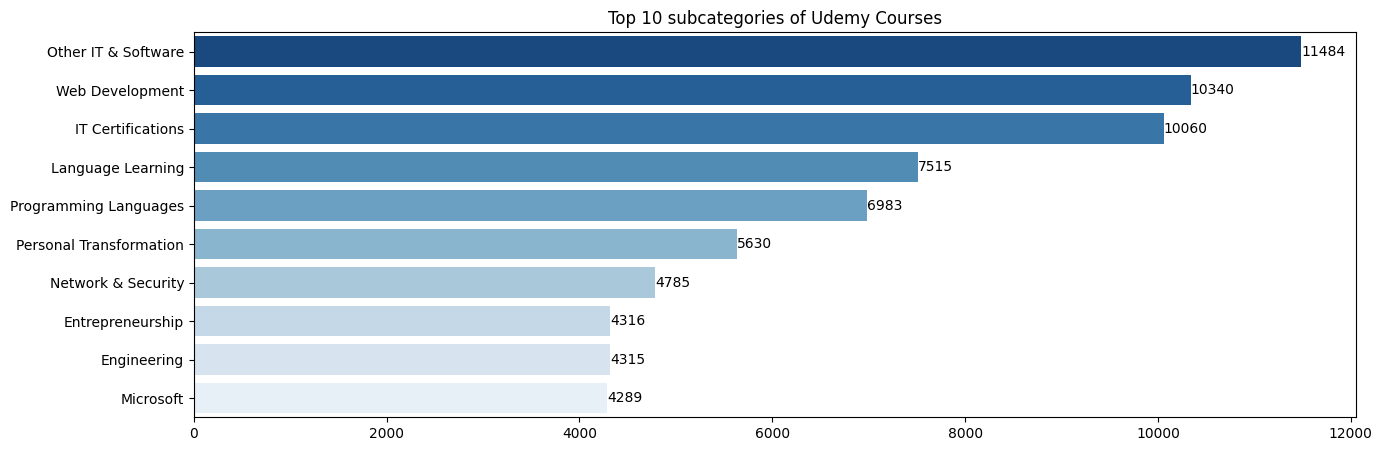

In [ ]:
df_subcategory = feature_quantity(df, 'subcategory')[:10]

plt.figure(figsize=(15,5))
ax = sns.barplot(x=df_subcategory['num_trx'], y=df_subcategory['subcategory'], palette='Blues_r')

for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='', ylabel='', title='Top 10 subcategories of Udemy Courses')
plt.show()

Observations:
- Web development is the most popular subcategory, with 10,340 students enrolled. This suggests that there is a high demand for skills in web development.
- Other IT & Software is the second most popular subcategory, with 11,484 students enrolled. This broad category likely encompasses a variety of in-demand IT skills.
- Programming languages is the fourth most popular subcategory, with 6,983 students enrolled. This suggests that there is a strong interest in learning programming languages.

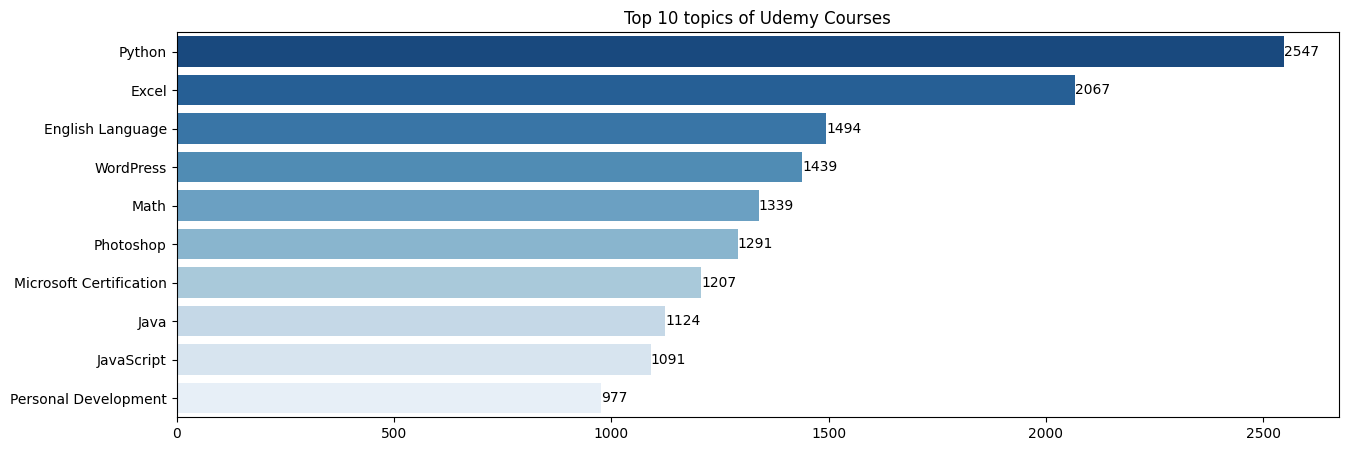

In [ ]:
df_topic = feature_quantity(df, 'topic')[:10]

plt.figure(figsize=(15,5))
ax = sns.barplot(x=df_topic['num_trx'], y=df_topic['topic'], palette='Blues_r')

for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='', ylabel='', title='Top 10 topics of Udemy Courses')
plt.show()

Observations:
- The most popular topic by far is Python, with nearly 2,550 courses.
- Other programming languages like Excel, JavaScript, and Java also rank high, all exceeding 1,000 courses.
-  The dominance of programming languages and web development courses suggests a high demand for tech skills in today's job market. People might be looking to upskill or reskill themselves to land better job opportunities.

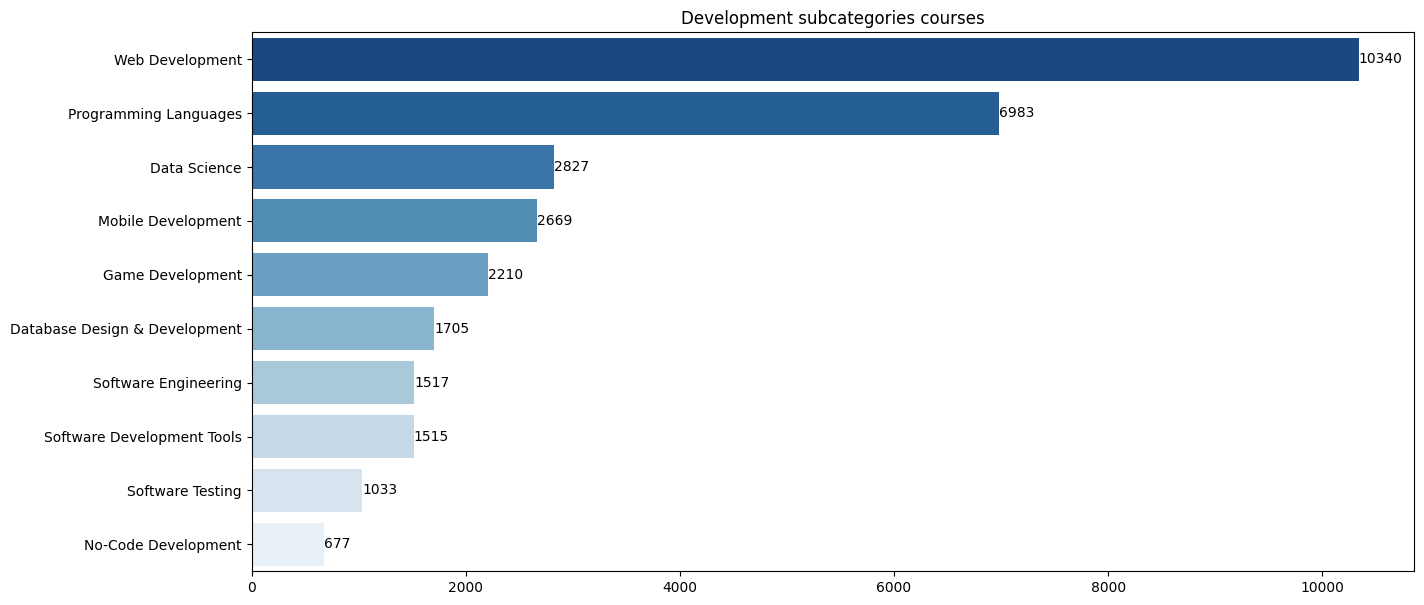

In [ ]:
def subcategory_plot(df, category):
    development = df[df['category']==category]
    df_dev = development.groupby('subcategory').size().reset_index(name='count')
    df_dev = df_dev.sort_values(by='count', ascending=False)

    plt.figure(figsize=(15,7))
    ax = sns.barplot(x=df_dev['count'], y=df_dev['subcategory'], palette='Blues_r')

    for label in ax.containers:
        ax.bar_label(label)
    ax.set(xlabel='', ylabel='', title=f'{category} subcategories courses')
    plt.show()

subcategory_plot(df, 'Development')

Observations:
- The most popular subcategory by a significant margin is `Web Development` with over 10,300 students enrolled. This indicates a strong interest in learning how to build websites.
- Other programming-related subcategories like `Programming Languages` and `Game Development` are also popular, with over 6,900 and 2,200 students respectively. This shows a high interest in learning coding.
- Subcategories like `Mobile Development` (2,600 students) and `Data Science` (2,800 students) indicate a demand for skills relevant to the tech industry.

In [ ]:
# Get top courses by categories according to highest num_subscribers
most_popular_courses = df.sort_values(by='num_subscribers', ascending=False).groupby('category').head(1)
most_popular = most_popular_courses[['title', 'category','num_subscribers']].reset_index(drop=True)
most_popular.sort_values(by='num_subscribers', ascending=False)

,title,category,num_subscribers
0,Java Tutorial for Complete Beginners,Development,1752364
1,Microsoft Excel - Excel from Beginner to Advanced,Office Productivity,1108811
2,The Complete Digital Marketing Course - 12 Cou...,Marketing,706339
3,Ultimate AWS Certified Solutions Architect Ass...,IT & Software,640699
4,The Complete SQL Bootcamp 2022: Go from Zero t...,Business,574046
5,Adobe Photoshop CC: A Beginner to Advanced Pho...,Design,510784
6,Adobe Premiere Pro CC Masterclass: Video Editi...,Photography & Video,436304
7,English Launch: Learn English for Free - Upgra...,Teaching & Academics,360861
8,The Complete Financial Analyst Course 2022,Finance & Accounting,356765
9,Pianoforall - Incredible New Way To Learn Pian...,Music,355854


Observations:
1. The Java programming and Microsoft Excel courses have the highest number of subscribers. Java Tutorial for Complete Beginners: 1,752,364 subscribers and
Microsoft Excel - Beginner to Advanced: 1,108,811 subscribers.
2. People are most interested in courses that teach practical job skills, but there is also considerable interest in personal development and creative arts. While niche courses have fewer subscribers, they meet specific needs and interests.

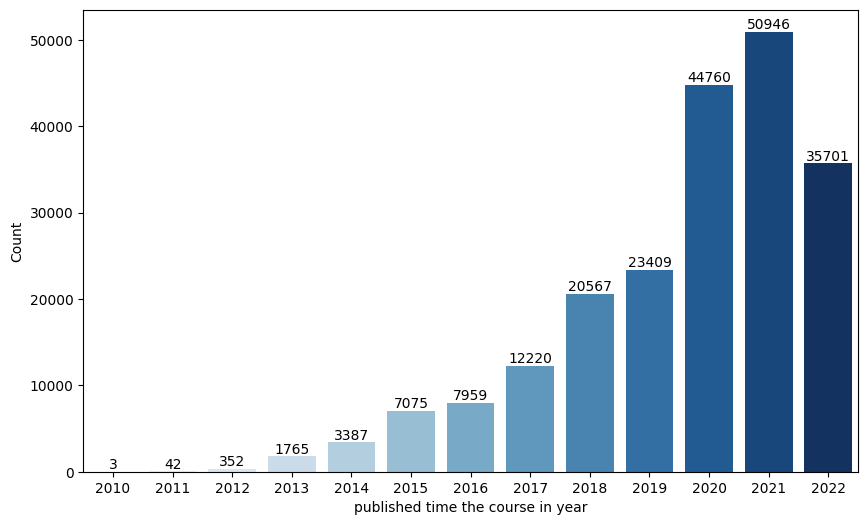

In [ ]:
# published_time_in_year
published_time = df['published_time'].dt.year

plt.figure(figsize=(10,6))
ax = sns.countplot(x=published_time, hue=published_time, palette='Blues', legend=False)

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='published time the course in year', ylabel='Count')
plt.show()

Observations:
- From 2010 to 2021, the number of courses published increased each year, peaking in 2021 with 50,946 courses. This surge can be attributed to the COVID-19 pandemic, which drove more people to pursue online education, resulting in a higher demand for and supply of online courses. There was a decline in the number of courses published in 2022.

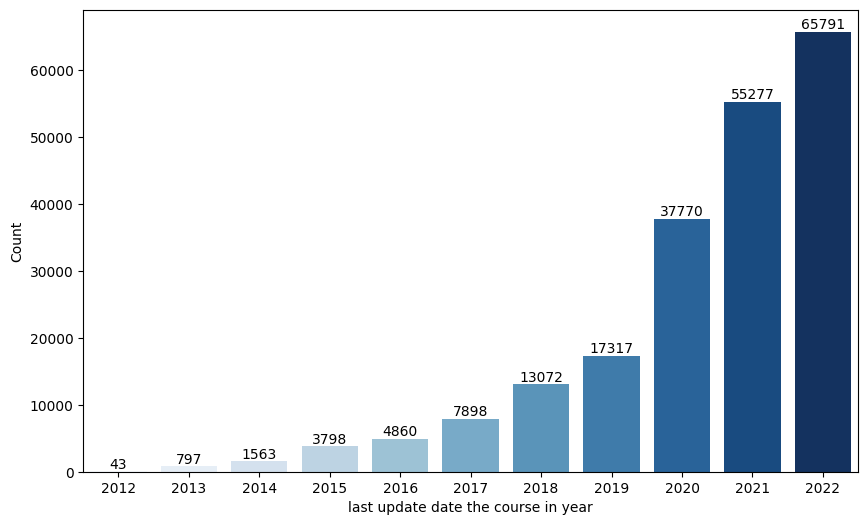

In [ ]:
# last_update_date_in_year
last_update_date = df['last_update_date'].dt.year

plt.figure(figsize=(10,6))
ax = sns.countplot(x=last_update_date, hue=last_update_date, palette='Blues', legend=False)

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='last update date the course in year', ylabel='Count')
plt.show()

Observations:
- The last update data for courses shows an increase each year, peaking in 2022. This indicates that instructors are increasingly committed to keeping course content up-to-date and relevant. The peak in 2022 reflects strong efforts to adapt to new developments and maintain high-quality courses.

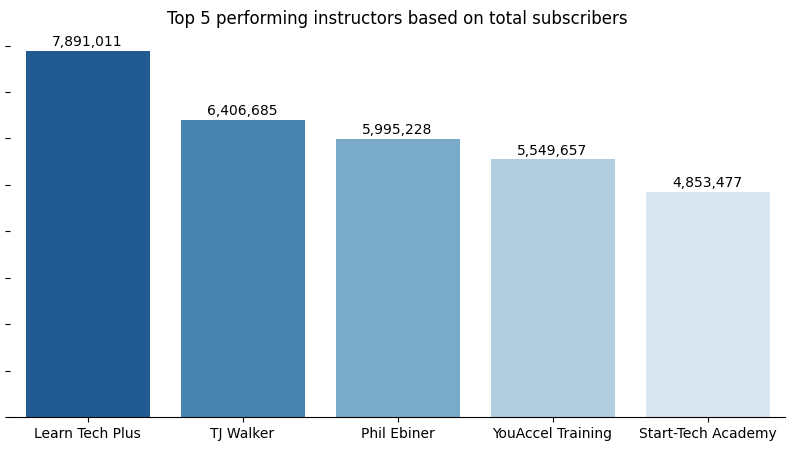

In [ ]:
instructor_count = df.groupby('instructor_name')['num_subscribers'].sum().reset_index()
top_instructor = instructor_count.sort_values(by='num_subscribers', ascending=False)[:5]

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_instructor['instructor_name'], y = top_instructor['num_subscribers'], palette='Blues_r')

patches = ax.patches
for patch, count in zip(patches, top_instructor['num_subscribers']):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()
    ax.annotate('{:,}'.format(count), (x, y), xytext=(0,1), textcoords="offset points",
                ha="center", va="bottom", fontsize=10)

ax.set(xlabel='', ylabel='', title='Top 5 performing instructors based on total subscribers')
ax.set_yticklabels([])
sns.despine(left=True)
plt.show()

Observations:
- The instructor with the highest number of subscribers is Learn Tech Plus, with 7,891,011 subscribers. This indicates they are highly popular and trusted by many users. This could be due to the quality of their courses, relevant topics, and effective teaching methods.
- J Walker and Phil Ebiner, who are in the second and third positions, respectively, each have over 6 million and nearly 6 million subscribers. This shows that they are also highly credible and have a large user base that trusts the quality of their courses.
- YouAccel Training and Start-Tech Academy also have a very large number of subscribers, with over 5 million and nearly 5 million subscribers respectively. This indicates that instructors offering a variety of engaging and practical topics can attract a large number of students.

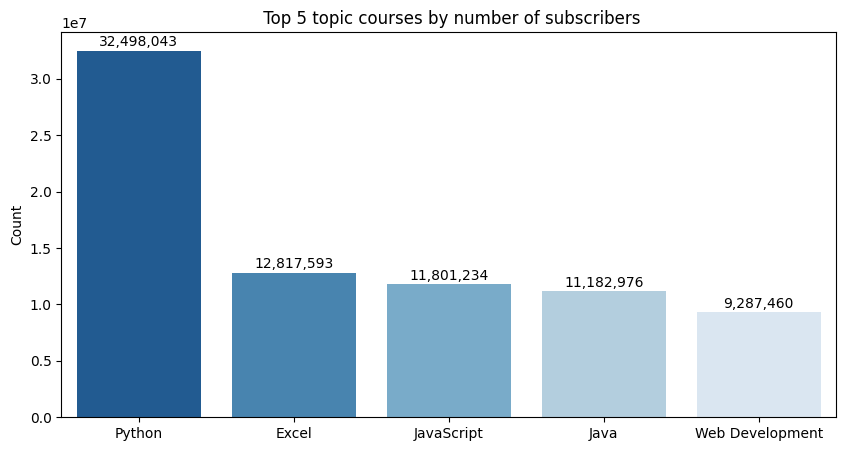

In [ ]:
topic_subscribers = df.groupby('topic')['num_subscribers'].sum().reset_index()
top_topic_subs = topic_subscribers.sort_values(by='num_subscribers', ascending=False)[:5]

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_topic_subs['topic'], y=top_topic_subs['num_subscribers'], palette='Blues_r')

for patch, count in zip(ax.patches, top_topic_subs['num_subscribers']):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()
    ax.annotate('{:,}'.format(count), (x, y), xytext=(0,1), textcoords="offset points",
                ha="center", va="bottom", fontsize=10)


ax.set(xlabel='', ylabel='Count', title=' Top 5 topic courses by number of subscribers')
plt.show()

Observations:
- Python is the most subscribed topic on Udemy, with 32,498,043 subscribers. Its popularity reflects its versatility and extensive use in fields such as data science, automation, and web development.
- Excel follows closely with 12,817,593 subscribers, highlighting its importance in business, finance, and data analysis.
- JavaScript, with 11,801,234 subscribers, remains crucial for web development, powering interactive and dynamic web pages.
- Java, with 11,182,976 subscribers, maintains its relevance in enterprise-level applications, Android development, and large-scale projects.
- Web Development, with 9,287,460 subscribers, encompasses essential skills like HTML, CSS, and JavaScript, reflecting its role in creating websites and web applications.

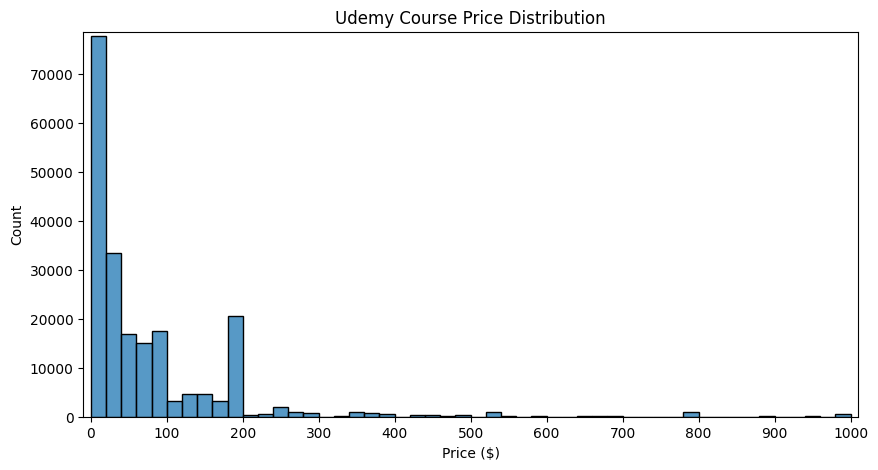

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df, x='price', bins=50)
ax.set(xlabel='Price ($)', title='Udemy Course Price Distribution')
plt.xticks(range(0,1001,100))
plt.margins(0.01)
plt.show()

Observations:
- The right-skewed distribution suggests that Udemy courses are generally affordable, with a higher number of lower-priced options. This makes the platform accessible to a broader range of learners.
- The average price of 15 reflects a perceived value by both instructors and learners. It's a price point that balances affordability with the perceived value of the course content.
- It's noticeable that some courses are priced at 0, meaning these courses are offered for free.
- The distribution of Udemy course prices shows a skew to the right, indicating affordability with a majority of courses priced lower. The average course price of $15 demonstrates a balanced pricing strategy, and the availability of free courses enhances accessibility and attracts more learners to the platform.

In [ ]:
def get_yearly_feature(df):

    df_year = df.copy()
    df_year['published_year'] = df_year['published_time'].dt.year

    features = ['num_subscribers','num_reviews', 'num_comments', 'num_lectures']
    year = df_year.groupby('published_year')['id'].count().reset_index()
    for feature in features:
        feature_year = df_year.groupby('published_year')[feature].sum().reset_index()
        year = pd.concat([year, feature_year.iloc[: , 1:]], axis=1)

    return year

In [ ]:
def yearly_feature_plot(data, feature):

    dict_cols = dict({'id' : 'Number of courses published',
                      'num_subscribers' : 'Total subscribers',
                      'num_comments' : 'Total comments',
                      'num_reviews' : 'Total reviews',
                      'num_lectures' : 'Total lectures'})

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x=data['published_year'], y=data[feature], color='lightgray')

    highest_subscribers_index = data[feature].idxmax()

    ax.patches[highest_subscribers_index].set_facecolor('steelblue')

    for i, count in enumerate(data[feature]):
        ax.annotate(f'{count:,}', xy = (i, count), xytext=(0,2), textcoords="offset points",
                    ha="center", va="bottom", fontsize=8,
                    fontweight='bold' if i == highest_subscribers_index else 'normal')

    if feature in list(dict_cols.keys()):
        feature_name = dict_cols[feature]

    ax.set(xlabel='', ylabel='', title=f'{feature_name} from 2010 - 2022')

    # Removing spines from the plot
    sns.despine(left=True)

    plt.show()

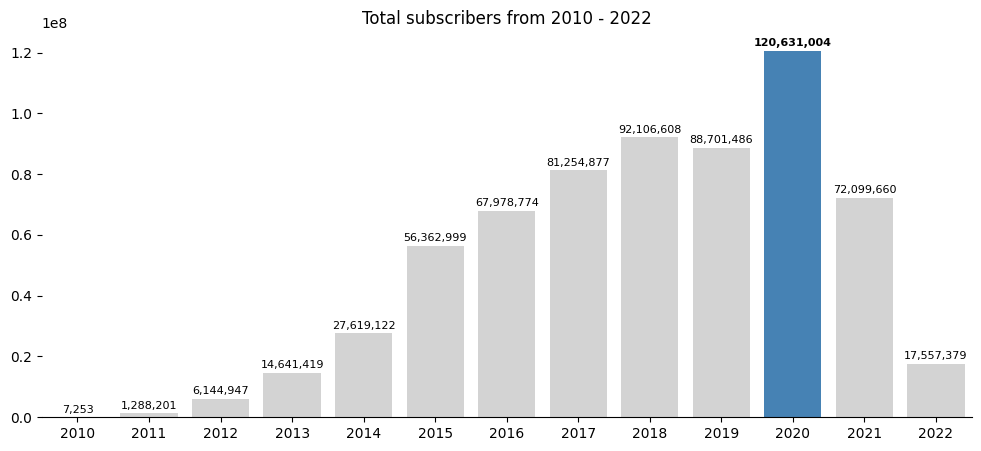

In [ ]:
data_yearly = get_yearly_feature(df)

yearly_feature_plot(data_yearly, 'num_subscribers')

Observations:
- The trend in total Udemy subscribers shows a steady increase until 2019, followed by a significant spike in 2020 due to the COVID-19 pandemic, and a notable decline in 2021 and 2022. This illustrates a rising adoption of online learning, particularly during the pandemic, but also reflects changing dynamics in online learning behavior after the pandemic situation.

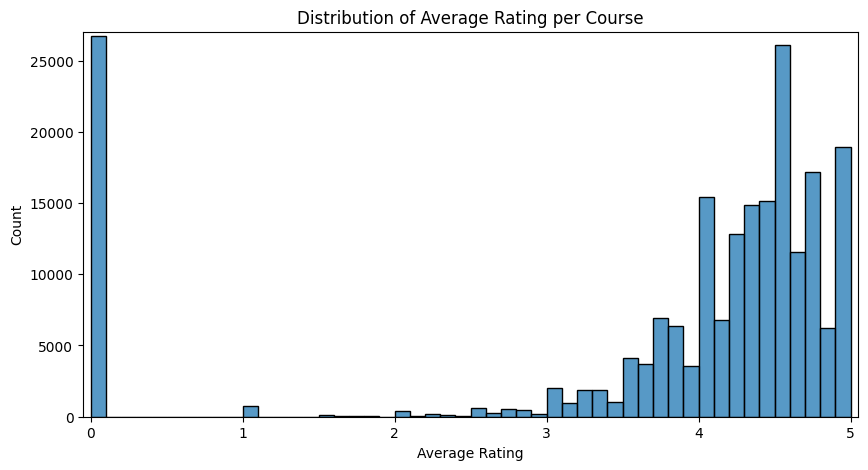

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df, x='avg_rating', bins=50)
ax.set(xlabel='Average Rating', title='Distribution of Average Rating per Course')
plt.margins(0.01)
plt.show()

Observations:
- The majority of courses have an average rating between 4 and 5 stars, indicating that most users are satisfied with the quality and content of the courses they take. This reflects instructors' efforts to provide a high-quality learning experience.
- There are a significant number of courses with an average rating of 3 stars. This may suggest variation in course quality, where some courses meet user expectations well, while others may have some weaknesses or areas that need improvement.
- Although a minority, there are a small number of courses with an average rating of 2 stars or lower. This could indicate that these courses may have serious issues such as inadequate content, ineffective teaching methods, or other problems that lead users to be dissatisfied.

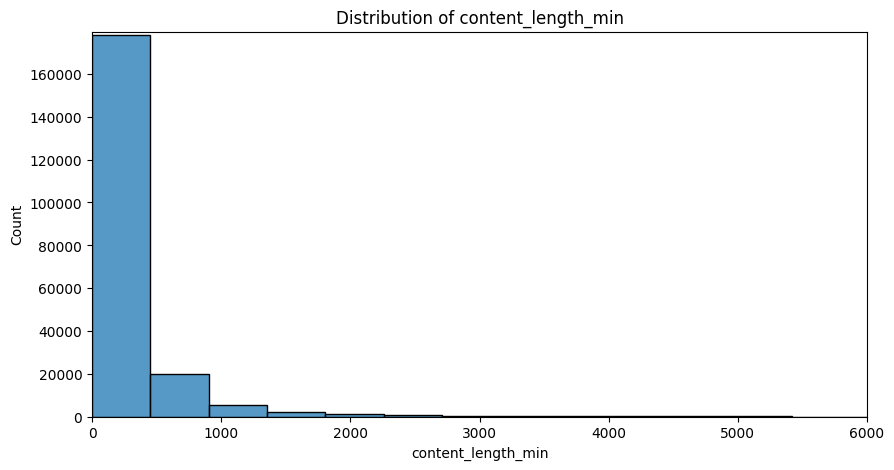

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df, x='content_length_min', bins=50)
ax.set(xlabel='content_length_min', title='Distribution of content_length_min')
plt.margins(0.01)
# plt.xlim(0,6000)
plt.show()

Observations:
- The majority of courses have a duration between 60 and 120 minutes. This reflects instructors' efforts to provide sufficient material to cover specific topics without being too lengthy or too brief.
- There are a significant number of courses with a duration of less than 60 minutes. This trend may indicate a preference for shorter courses suitable for quick learning or specific topics.
- Although a minority, there are also courses with a duration of more than 120 minutes. These courses may cover broader or more in-depth topics, requiring more time to complete.
- Courses with a duration of 0 minutes are outliers and unlikely to occur, as every course should have a measurable duration. This could be due to errors or incomplete data in the dataset.

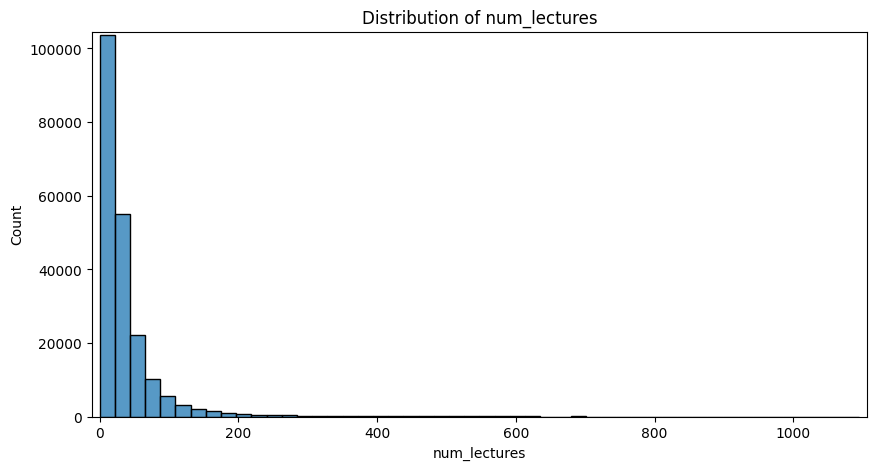

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df, x='num_lectures', bins=50)
ax.set(xlabel='num_lectures', title='Distribution of num_lectures')
plt.margins(0.01)
plt.show()

Observations:
- The distribution shows that the majority of courses have a total number of lectures below 100, with a peak around 40. This reflects the varying lengths of courses available on Udemy, ranging from short courses to more comprehensive ones.
- There are some courses that have a very high total number of lectures, exceeding 200. These courses likely offer extensive or deep material, or they may be bundles of several smaller courses.
- Courses with a total number of lectures at 0 are outliers and unlikely to occur, as every course should have a measurable number of lectures. This could be due to errors or incomplete data in the dataset.

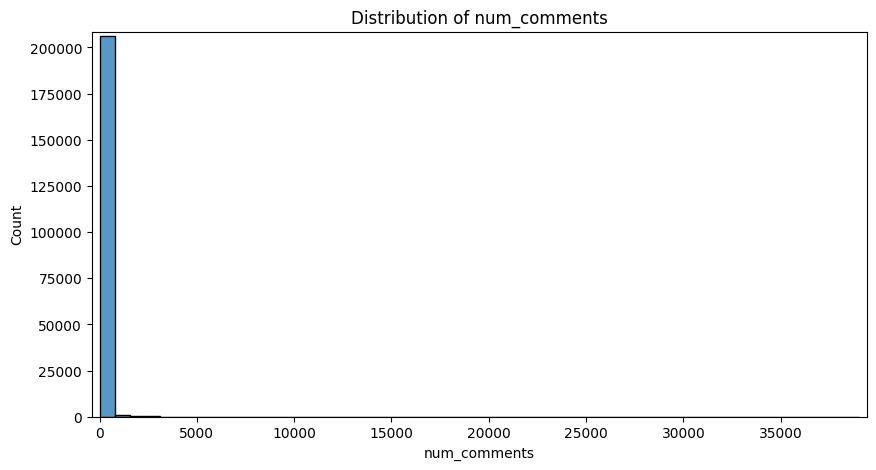

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df, x='num_comments', bins=50)
ax.set(xlabel='num_comments', title='Distribution of num_comments')
plt.margins(0.01)
plt.show()

Observations:
- The majority of courses receive around 50 reviews, indicating they receive a sufficient amount of feedback, but not exceptionally high.
- Some courses have zero reviews, likely because they are new or haven't received any reviews yet.
- Half of all courses have 5 reviews or fewer, showing that many courses have relatively few reviews. However, some courses have received a very high number of reviews, up to 39,040, indicating they are highly popular.
- The graph also shows a wide variation in the number of reviews between courses, with some courses receiving significantly more reviews than others.

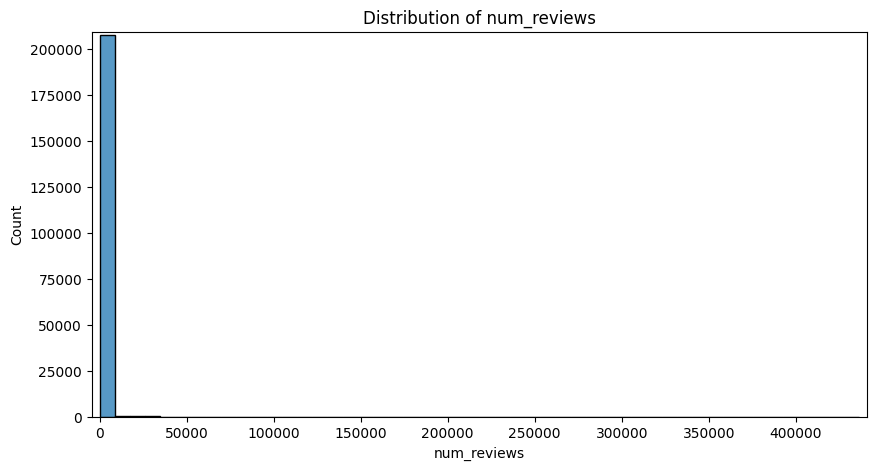

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df, x='num_reviews', bins=50)
ax.set(xlabel='num_reviews', title='Distribution of num_reviews')
plt.margins(0.01)
plt.show()

Observations:
- The data on the number of reviews per course on Udemy shows that most courses receive a moderate amount of reviews, with an average of around 245 reviews per course.
- However, there is a significant variation in the number of reviews between courses. Some courses are highly popular and receive thousands of reviews, while others have a wide range of review counts, ranging from very few to very many.

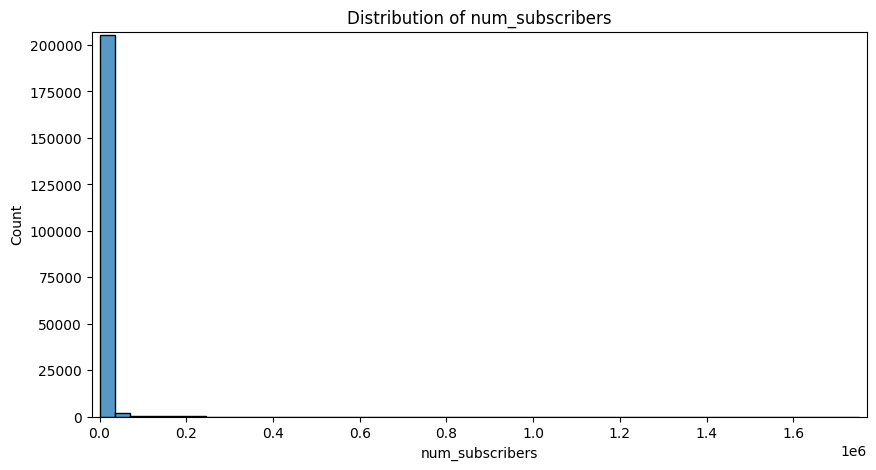

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df, x='num_subscribers', bins=50)
ax.set(xlabel='num_subscribers', title='Distribution of num_subscribers')
plt.margins(0.01)
plt.show()

Observations:
- The data on the number of subscribers per course on Udemy shows that most courses have a relatively small to moderate number of subscribers, with an average of around 3,105 subscribers per course.
- However, there is a significant variation in the number of subscribers between courses. Some courses are highly popular and have a very high number of subscribers, while others have a wide range of subscriber counts, ranging from very few to very many.

# **Data Comments**

In [ ]:
# load data comments
comments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ DS 24_Novita Fitriani_Progress Final Project/Dataset/Comments.csv')

In [ ]:
# Showing top 5 rows of the data comments
comments.head()

,id,course_id,rate,date,display_name,comment
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...


In [ ]:
#show info from data comments
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411727 entries, 0 to 9411726
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   course_id     int64  
 2   rate          float64
 3   date          object 
 4   display_name  object 
 5   comment       object 
dtypes: float64(1), int64(2), object(3)
memory usage: 430.8+ MB


Observations:
- All data types (dtypes) seem **appropriate**, given the corresponding column name.

In [ ]:
#drop columns comments because not necessery
comments = comments.drop(columns='comment', axis=1)

In [ ]:
# Showing top 5 rows of the data comments
comments.head()

,id,course_id,rate,date,display_name
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony


### **Missingg Value Check**

In [ ]:
missing_value(comments)

,Columns,N/A count,Percentage,Max,Min
4,display_name,75387,0.801%,-,-
0,id,0,0.0%,126709072,54
1,course_id,0,0.0%,4913148,1769
2,rate,0,0.0%,5.0,0.5
3,date,0,0.0%,-,-


Observations:
- We can safely delete the missing values in the display_name column, as they account for only 0.801% of the total data. This small percentage will not significantly impact further data analysis or processing.

In [ ]:
# drop all nan value
comments = comments.dropna(axis=0)

# check missing value again
missing_value(comments)

,Columns,N/A count,Percentage,Max,Min
0,id,0,0.0%,126709072,54
1,course_id,0,0.0%,4913148,1769
2,rate,0,0.0%,5.0,0.5
3,date,0,0.0%,-,-
4,display_name,0,0.0%,-,-


### **Duplicated Check**

In [ ]:
# number of duplicated data comments
comments.duplicated().sum()

0

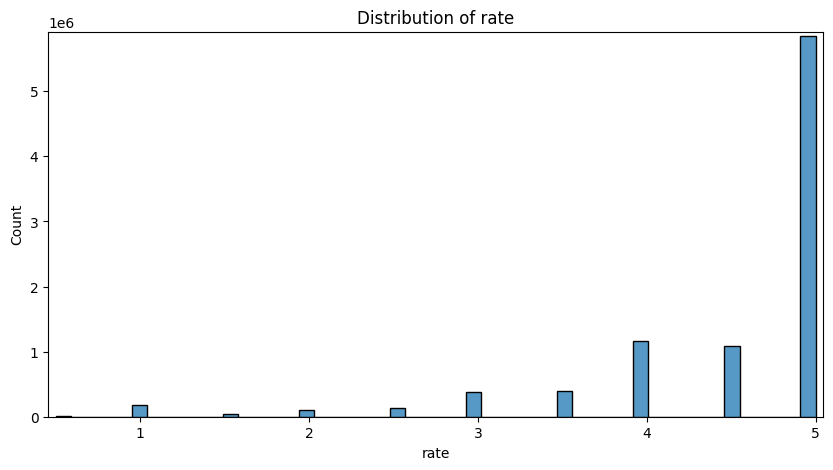

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.histplot(comments, x='rate', bins=50)
ax.set(xlabel='rate', title='Distribution of rate')
plt.margins(0.01)
plt.show()

Observations:
- The majority of courses receive ratings of 4 and 5, indicating that most users give positive reviews for these courses. This reflects user satisfaction with the quality and content of courses on Udemy.
- Only a small percentage of courses receive ratings below 3. This suggests that the majority of courses on the Udemy platform have good quality, although some may need improvement to increase their ratings.
- A rating of 0 indicates that the course has not received any ratings yet. This could be due to newly released courses or lesser-known courses that haven't received enough reviews from users yet.

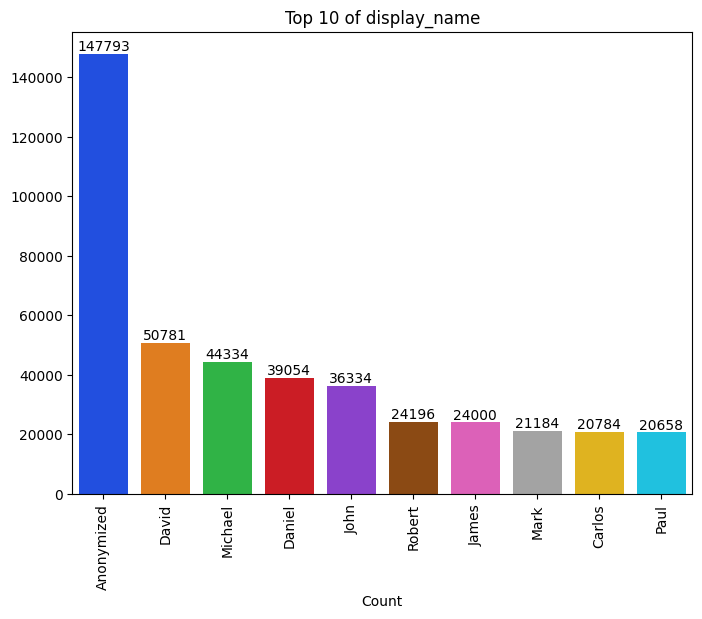

In [ ]:
#display_name
display_name = feature_quantity(comments, 'display_name')[:10]

plt.figure(figsize=(8,6))
ax = sns.barplot(x=display_name['display_name'], y=display_name['num_trx'], palette='bright')

for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='Count', ylabel='', title='Top 10 of display_name')
plt.xticks(rotation=90)
plt.show()

Observations:
- The graph shows that the username "Anonymized" has the highest number of course enrollments on Udemy, totaling 147,793. Names like David, Michael, Daniel, and John are also popular on the platform, although in lower numbers compared to "Anonymized". This reflects the diverse privacy preferences and identity choices made by users when using Udemy.

In [ ]:
# Converting 'date' column to datetime type with UT
comments['date'] = pd.to_datetime(comments['date'], utc=True)

# Convert datetime aware to datetime naive (without timezone) or stick with UTC
comments['date'] = comments['date'].dt.tz_convert(None)  # Delete timezone

# Extracting the year from the 'date' column
date = comments['date'].dt.year

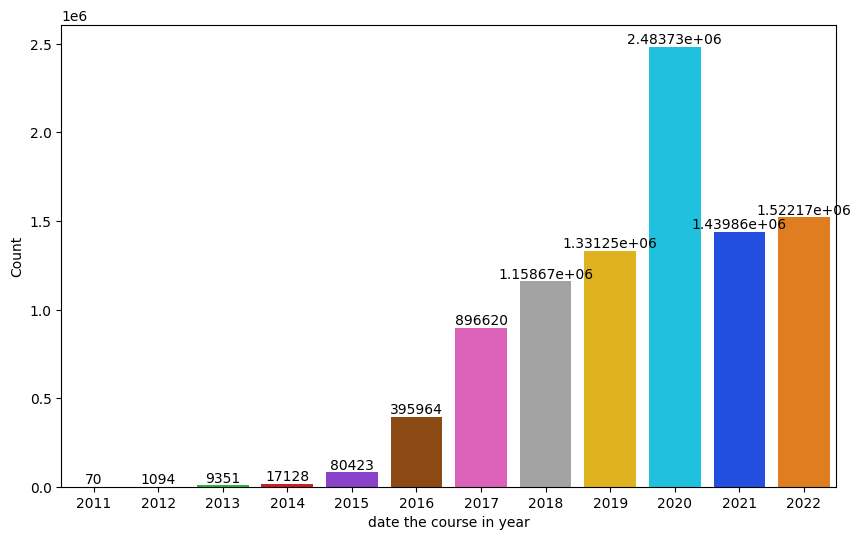

In [ ]:
#date
plt.figure(figsize=(10,6))
ax = sns.countplot(x=date, hue=date, palette='bright', legend=False)

for label in ax.containers:
    ax.bar_label(label)

ax.set(xlabel='date the course in year', ylabel='Count')
plt.show()

Observations:
- The graph depicting the dates when reviews were given shows logical results, with an increase in the number of reviews that corresponds to what is seen in the previous graph of review counts. This confirms the validity of the data and consistency between the review date information and the number of reviews given by users for courses on Udemy.